In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
rst = pd.read_csv("E:\TA_restaurants_curated.csv")

In [3]:
rst.head(5)

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [4]:
rst.shape

(125527, 11)

In [5]:
rst.tail(5)

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
125522,1662,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13273526-Reviews-K...,d13273526
125523,1663,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13292844-Reviews-B...,d13292844
125524,1664,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13296092-Reviews-R...,d13296092
125525,1665,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13323362-Reviews-Y...,d13323362
125526,1666,dieci,Zurich,"['Italian', 'Pizza', 'Mediterranean', 'Diner']",NaN,NaN,$$ - $$$,NaN,NaN,/Restaurant_Review-g188113-d13349842-Reviews-D...,d13349842


In [6]:
Rst = rst.sample(n=10000,replace="False")

In [7]:
Rst = Rst.drop(["Unnamed: 0","URL_TA", "ID_TA" ], axis = 1)

In [8]:
Rst.columns

Index(['Name', 'City', 'Cuisine Style', 'Ranking', 'Rating', 'Price Range',
       'Number of Reviews', 'Reviews'],
      dtype='object')

In [9]:
Rst.isnull().sum()

Name                    0
City                    0
Cuisine Style        2522
Ranking               761
Rating                756
Price Range          3844
Number of Reviews    1397
Reviews               752
dtype: int64

In [10]:
Rst.shape

(10000, 8)

In [11]:
Rst.rename(columns={Rst.columns[2]:"Cuisine"},inplace="True")     #########  Cuisine Style ....

In [12]:
Rst.rename(columns={Rst.columns[5]:"PriceinRange"},inplace="True")     #########  Cuisine Style ....

In [13]:
Rst.rename(columns={Rst.columns[6]:"Reviewsinnos"},inplace="True")     #########  Cuisine Style ....

In [14]:
Rst.columns

Index(['Name', 'City', 'Cuisine', 'Ranking', 'Rating', 'PriceinRange',
       'Reviewsinnos', 'Reviews'],
      dtype='object')

In [15]:
Rst.head()

,Name,City,Cuisine,Ranking,Rating,PriceinRange,Reviewsinnos,Reviews
48307,Piebury Corner - Kings Cross,London,"['British', 'Bar', 'Pub', 'Diner', 'Scottish',...",2732.0,4.5,$$ - $$$,40.0,"[['Lovely evening', 'Brilliant pie before an a..."
108919,Pod Schudky,Prague,"['European', 'Czech']",NaN,NaN,NaN,NaN,NaN
94004,Tofuya,Paris,['Japanese'],4608.0,4.5,$$ - $$$,22.0,"[['Great for a tasty and healthy lunch', 'A ne..."
27180,Tinto,Budapest,['Spanish'],2035.0,3.5,NaN,15.0,"[['Great place', 'Brilliant'], ['02/15/2017', ..."
106532,Pivonkove Zatisi,Prague,NaN,2266.0,4.0,NaN,19.0,"[['Chinese is Chinese', 'Cheap but not very go..."


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
####  City   

Total_restaurants = Rst['City'].value_counts(dropna=False)
print("\n Sorted by number of restaurants \n")
print(Total_restaurants)
total_rest = Total_restaurants.sum()
print("\n Total number of restaurants: {}".format(total_rest))



 Sorted by number of restaurants 

London        1438
Paris         1176
Madrid         768
Barcelona      657
Berlin         591
Milan          525
Rome           467
Prague         373
Lisbon         334
Vienna         310
Brussels       281
Hamburg        270
Lyon           258
Amsterdam      251
Munich         230
Stockholm      207
Budapest       202
Copenhagen     193
Warsaw         190
Dublin         157
Edinburgh      148
Geneva         138
Athens         136
Zurich         125
Oporto         118
Helsinki       103
Oslo           101
Bratislava      79
Krakow          79
Luxembourg      52
Ljubljana       43
Name: City, dtype: int64

 Total number of restaurants: 10000


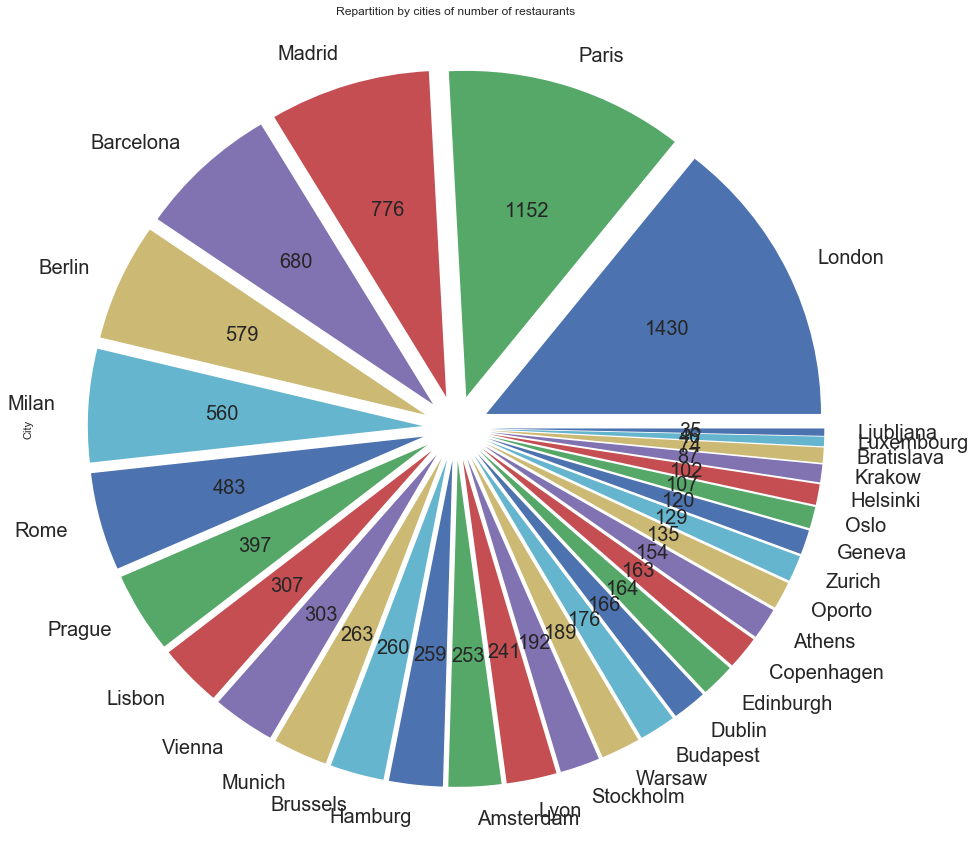

In [241]:
explode = [0.1 for i in Total_restaurants]
Total_restaurants.plot(kind='pie', figsize=(15, 15), explode=explode, fontsize=20, autopct=lambda v: int(v*total_rest/100),
                        title="Repartition by cities of number of restaurants")

In [242]:
### London has maximum nos. of restaurants ......

In [18]:
Rst.PriceinRange.value_counts()

$$ - $$$    4332
$           1487
$$$$         337
Name: PriceinRange, dtype: int64

In [19]:
Rst.PriceinRange.isnull().sum()

3844

In [20]:
Rst["PriceinRange"] = Rst["PriceinRange"].map({"$": "low" , "$$$$" : "High" , "$$ - $$$" : "Mid" })

In [21]:
Rst.PriceinRange.isnull().sum()

3844

In [22]:
#tia.age=tia.age.fillna('29.842592624521075')
Rst.PriceinRange = Rst.PriceinRange.fillna("Unknown")

In [23]:
Rst.PriceinRange.value_counts()

Mid        4332
Unknown    3844
low        1487
High        337
Name: PriceinRange, dtype: int64

In [24]:
Rst.PriceinRange.head(10)

48307         Mid
108919    Unknown
94004         Mid
27180     Unknown
106532    Unknown
51328         Mid
82367         Mid
24440         Mid
75299         low
229           Mid
Name: PriceinRange, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

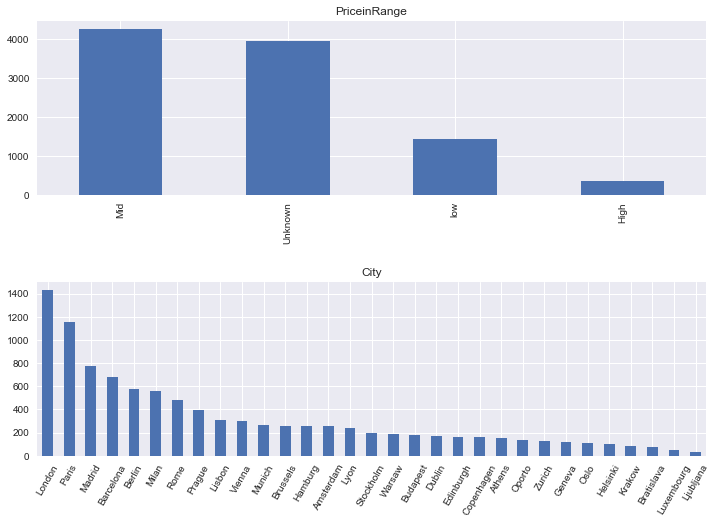

In [250]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plt.subplots_adjust(wspace=1.0, hspace=0.50)
Rst.PriceinRange.value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("PriceinRange")
Rst.City.value_counts().plot(kind="bar", ax=ax[1])
ax[1].set_title("City")
plt.xticks(rotation=60)

London , Paris and madrid has medium price range . And High values in Geneva krakow and Helsinki .

In [25]:
Rst.head(20)

,Name,City,Cuisine,Ranking,Rating,PriceinRange,Reviewsinnos,Reviews
48307,Piebury Corner - Kings Cross,London,"['British', 'Bar', 'Pub', 'Diner', 'Scottish',...",2732.0,4.5,Mid,40.0,"[['Lovely evening', 'Brilliant pie before an a..."
108919,Pod Schudky,Prague,"['European', 'Czech']",NaN,NaN,Unknown,NaN,NaN
94004,Tofuya,Paris,['Japanese'],4608.0,4.5,Mid,22.0,"[['Great for a tasty and healthy lunch', 'A ne..."
27180,Tinto,Budapest,['Spanish'],2035.0,3.5,Unknown,15.0,"[['Great place', 'Brilliant'], ['02/15/2017', ..."
106532,Pivonkove Zatisi,Prague,NaN,2266.0,4.0,Unknown,19.0,"[['Chinese is Chinese', 'Cheap but not very go..."
51328,Frankie & Benny's,London,"['Italian', 'American', 'Pizza', 'Vegetarian F...",5757.0,3.5,Mid,346.0,"[['Evening Meal', 'Brekkie'], ['12/22/2017', '..."
82367,Central Cafe,Milan,['Italian'],5448.0,3.5,Mid,20.0,"[['Central Caffe', 'The best was the cold hein..."
24440,Winery Boitsfort,Brussels,"['Belgian', 'Mediterranean', 'European', 'Soups']",2499.0,3.5,Mid,4.0,"[[], []]"
75299,Kiosco Torrero,Madrid,['Fusion'],7927.0,2.0,low,5.0,"[[], []]"
229,Sampurna,Amsterdam,"['Asian', 'Indonesian', 'Vegetarian Friendly',...",230.0,4.0,Mid,818.0,"[['An authentic Indonesian meal in Amsterdam',..."


In [253]:
### Which Cuisine has most no. of Rating and reviews ..

In [26]:
c = Rst.groupby('Cuisine')
c = c.sum()
c = c.sort_values(['Rating'], ascending=False)
c.head(10)

,Ranking,Rating,Reviewsinnos
Cuisine,,,
['Italian'],1081113.0,1004.5,7895.0
['French'],1224896.0,770.0,8527.0
['Spanish'],859379.0,633.5,7045.0
['Cafe'],471865.0,382.0,1637.0
"['French', 'European']",306891.0,352.5,30519.0
"['European', 'Portuguese']",156526.0,301.0,3405.0
['Pizza'],368222.0,287.0,2425.0
['Chinese'],429779.0,284.0,1264.0
['Mediterranean'],289166.0,252.5,1390.0


In [27]:
a = Rst.groupby("City")
a = a.sum()
a = a.sort_values(['Rating'], ascending = False)
a.head(10)

,Ranking,Rating,Reviewsinnos
City,,,
London,10720418.0,5089.5,155481.0
Paris,7656387.0,4384.5,132151.0
Madrid,3122677.0,2715.0,75412.0
Barcelona,2343059.0,2417.5,87810.0
Berlin,1708922.0,2194.0,31098.0
Rome,1437239.0,1977.0,127624.0
Milan,1499166.0,1856.5,80958.0
Prague,671403.0,1341.0,37467.0
Lisbon,593507.0,1270.5,32930.0


In [28]:
c = Rst.groupby('Reviews').sum()
c = c.sort_values(['Rating'], ascending=False)
c.head(10)

,Ranking,Rating,Reviewsinnos
Reviews,,,
"[[], []]",7347227.0,6085.0,14627.0
"[['Best night ever!!!', 'Great bar!! We loved it'], ['02/09/2018', '02/04/2018']]",1053.0,15.0,183.0
"[['Absolutely Perfect!!!', 'Small But Great!'], ['09/17/2017', '12/26/2015']]",21753.0,13.5,69.0
"[['Best Meal in Porto for Me', 'Distinguished Food Experience'], ['12/29/2017', '12/23/2017']]",327.0,13.5,594.0
"[['Stretchy pants', 'Time for a sushi break'], ['12/26/2017', '12/22/2017']]",864.0,12.0,2928.0
"[['Massive portions!!', 'Gluten free Czech food was a treat'], ['12/13/2017', '12/06/2017']]",1611.0,12.0,2451.0
"[['Nice sunday brunch but stolen jacket', 'Super nice place in the center of Brussels'], ['10/29/2017', '08/05/2017']]",3762.0,12.0,39.0
"[['Quick stop', 'Nice bowl of Goulash in the sun'], ['01/03/2018', '11/28/2017']]",3489.0,10.5,780.0
"[['New trendy decor and food. Lovely staff.'], ['01/05/2018']]",2966.0,10.0,NaN


In [257]:
#### Realtion of rating and price range ....

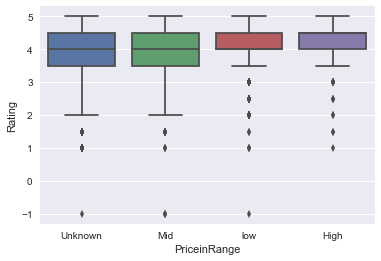

In [320]:
sns.boxplot(x="PriceinRange",y="Rating", data=Rst)    

Having High prices and Low price rating almost have the same ratings.
Also Low restaurants gives ratings from 1 ,2,3,4and 5 as well

In [259]:
### Realation of rating and No. of Reviews ...

E:\python\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


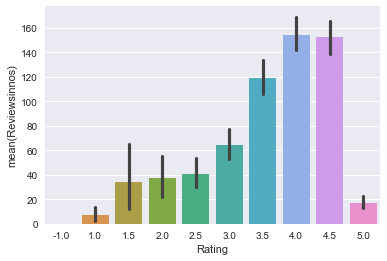

In [260]:
sns.barplot(x="Rating",y="Reviewsinnos", data=Rst)    

From the above observed that 4 star rating and the 4.5 star rating have the maximum amount of reviews followed by the 3.5 and the 3.0

Reviews per price range city wise ...

 Maximum 4.0 Rating restaurants and followed by 4.5 in our datasets .

In [29]:
Rst.Rating.value_counts()

 4.0    3217
 4.5    2453
 3.5    1547
 5.0     893
 3.0     694
 2.5     229
 2.0     113
 1.0      66
 1.5      30
-1.0       2
Name: Rating, dtype: int64

In [30]:
five_restaurants = Rst[Rst['Rating'] == 5]  ### 5 star restaurants ...

In [31]:
five_restaurants

,Name,City,Cuisine,Ranking,Rating,PriceinRange,Reviewsinnos,Reviews
114941,Green Bar,Rome,['Italian'],5813.0,5.0,Unknown,2.0,"[['Happy hour with Marco'], ['07/02/2015']]"
17367,Man Kee (eh. Plumhaus),Berlin,"['Chinese', 'Asian', 'Thai']",3572.0,5.0,Mid,2.0,"[[], []]"
97657,Ryaki,Paris,NaN,8261.0,5.0,Unknown,NaN,"[[], []]"
71435,La Cocina de Lola,Madrid,['Mexican'],4058.0,5.0,Unknown,NaN,"[[], []]"
53688,Vittorio's Deli,London,NaN,8117.0,5.0,Unknown,2.0,"[['Delicious Deli', 'Excellent home-made food'..."
67719,Enklima,Madrid,"['Fusion', 'Mediterranean', 'Spanish']",341.0,5.0,Mid,84.0,"[['A wonderful surprise', 'Fantastic food!'], ..."
53696,A y A,London,NaN,8125.0,5.0,Unknown,7.0,"[['Best place ever in London!!!!', 'Delicious,..."
43243,J&f Restaurant,Lisbon,"['Indian', 'European', 'Contemporary', 'Portug...",2153.0,5.0,low,3.0,"[['Local nice place in non tourist district', ..."
54518,John Charlick Foods,London,NaN,8947.0,5.0,Unknown,4.0,"[['Absolutely fantastic lunch in London', 'Bes..."
122647,Blekitny Zaulek,Warsaw,NaN,1141.0,5.0,Unknown,NaN,"[['Mirage'], ['05/28/2012']]"


#  Rating :

In [32]:
Rst["Rating"].unique()

array([ 4.5,  nan,  3.5,  4. ,  2. ,  5. ,  2.5,  1. ,  3. ,  1.5, -1. ])

In [33]:
Rst.Rating.head()  # Coverted to float .....

48307     4.5
108919    NaN
94004     4.5
27180     3.5
106532    4.0
Name: Rating, dtype: float64

In [34]:
Rst["Rating"] = Rst["Rating"].fillna(Rst["Rating"].mean())   #### Nan As a mean ..


In [35]:
Rst['Rating'] = Rst['Rating'].apply(lambda r: float(r))   ### Converting to float ..


In [36]:
Rst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 48307 to 84827
Data columns (total 8 columns):
Name            10000 non-null object
City            10000 non-null object
Cuisine         7478 non-null object
Ranking         9239 non-null float64
Rating          10000 non-null float64
PriceinRange    10000 non-null object
Reviewsinnos    8603 non-null float64
Reviews         9248 non-null object
dtypes: float64(3), object(5)
memory usage: 703.1+ KB


In [37]:
Rst.isnull().sum()

Name               0
City               0
Cuisine         2522
Ranking          761
Rating             0
PriceinRange       0
Reviewsinnos    1397
Reviews          752
dtype: int64

# Cuisine

In [38]:
Rst.Cuisine.unique()

array(["['British', 'Bar', 'Pub', 'Diner', 'Scottish', 'Vegetarian Friendly']",
       "['European', 'Czech']", "['Japanese']", ...,
       "['Bar', 'European', 'Pub', 'Hungarian', 'Vegetarian Friendly']",
       "['European', 'Pizza', 'Mediterranean', 'Vegetarian Friendly']",
       "['Cafe', 'Grill', 'Vegetarian Friendly']"], dtype=object)

In [327]:
Rst.Cuisine.value_counts()

['Italian']                                                                                                          284
['French']                                                                                                           196
['Spanish']                                                                                                          182
['Cafe']                                                                                                             134
['French', 'European']                                                                                                93
['Chinese']                                                                                                           89
['European', 'Portuguese']                                                                                            88
['Pizza']                                                                                                             86
['Italian', 'Pizza']            

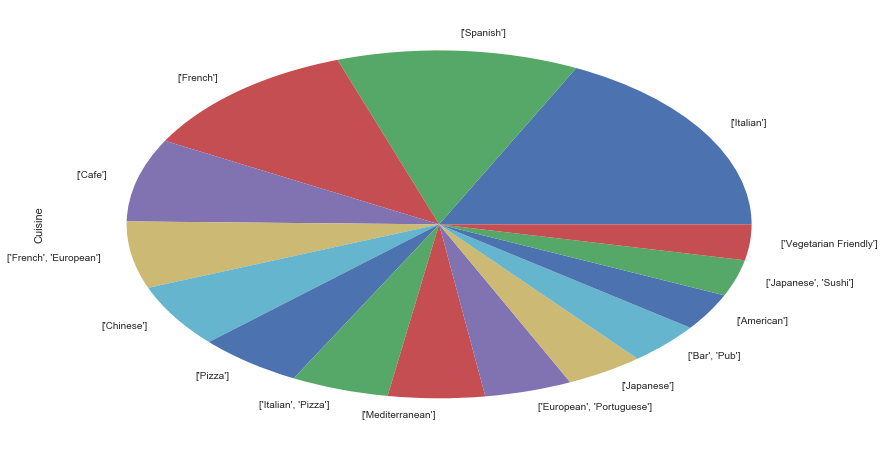

In [167]:
plt.figure(figsize = (14,8))
Rst.Cuisine.value_counts()[:15].plot(kind = 'pie')
plt.show()

Italian , Spanish and French are mostly restaurant Type

# City

Apply label encoder

In [ ]:
Rst.PriceinRange = Rst.PriceinRange.replace({"INDIVIDUAL":1,"JOINT":0})

# Ranking

In [39]:
Rst['Ranking'].value_counts()[:20]

1705.0     10
262.0       9
1015.0      9
549.0       9
686.0       8
696.0       8
1496.0      8
1032.0      8
109.0       8
1033.0      7
1689.0      7
1365.0      7
147.0       7
1533.0      7
245.0       7
166.0       7
954.0       7
1890.0      7
118.0       7
1789.0      7
2088.0      7
1122.0      7
2226.0      7
357.0       7
1257.0      6
63.0        6
984.0       6
455.0       6
1123.0      6
672.0       6
           ..
1712.0      2
64.0        2
3086.0      2
3059.0      2
1999.0      2
2333.0      2
32.0        2
2048.0      2
14764.0     2
3013.0      2
2566.0      2
7281.0      2
1241.0      2
86.0        2
1201.0      2
2338.0      2
2246.0      2
2326.0      2
4741.0      2
7652.0      2
7750.0      2
5120.0      2
24.0        2
96.0        2
1.0         2
1184.0      2
56.0        2
323.0       2
4096.0      2
20.0        2
Name: Ranking, Length: 1743, dtype: int64

 Here all the values are unique ..

In [40]:
Rst.Ranking.isnull().sum()

761

In [41]:
Rst["Ranking"] = Rst["Ranking"].fillna(Rst["Ranking"].mean()) #### Null Get replaced by mean...

In [ ]:
### Ranking needs to be standardize .

# Number of reviews

In [42]:
total_reviews = Rst['Reviewsinnos'].sum()
total_reviews

1077712.0

In [43]:
Rst["Reviewsinnos"] = Rst["Reviewsinnos"].fillna(Rst["Reviewsinnos"].mean())

#bko["lead_time"] = bko["lead_time"].fillna(bko["lead_time"].mean()) 

In [44]:
total_reviews_pr = Rst.groupby('PriceinRange')['Reviewsinnos'].sum()
total_reviews_pr = pd.DataFrame({'Reviewsinnos': total_reviews_pr})

In [45]:
total_reviews_pr   ####### price in range accordingly Reviews in Nos .

,Reviewsinnos
PriceinRange,
High,121834.889690
Mid,799325.463908
Unknown,177094.617459
low,154461.523190


In [336]:
reviews_count_pr

,low price range,mid price range,high price range,unknown price range
City,,,,
Amsterdam,2528.0,25736.0,484.0,3015.0
Athens,1624.0,9163.0,562.0,2599.0
Barcelona,7489.0,66039.0,2267.0,6669.0
Berlin,2555.0,20180.0,1688.0,3909.0
Bratislava,793.0,1237.0,238.0,174.0
Brussels,1742.0,18766.0,638.0,1901.0
Budapest,3031.0,23919.0,513.0,3815.0
Copenhagen,27.0,12488.0,339.0,1581.0
Dublin,117.0,18279.0,210.0,1143.0


# PriceinRange

In [47]:
Rst.PriceinRange.value_counts()

Mid        4332
Unknown    3844
low        1487
High        337
Name: PriceinRange, dtype: int64

In [48]:
Rst.PriceinRange = Rst.PriceinRange.replace({"low":1,"Unknown":0,"Mid":2,"High":3})  ### To Numerical.. Again run

In [49]:
Rst.PriceinRange.head(10)

48307     2
108919    0
94004     2
27180     0
106532    0
51328     2
82367     2
24440     2
75299     1
229       2
Name: PriceinRange, dtype: int64

In [ ]:
##################################

In [181]:
reviews_count_pr = reviews_count_pr.unstack(level='PriceinRange')
reviews_count_pr.columns = ['low price range', 'mid price range', 'high price range', 'unknown price range']

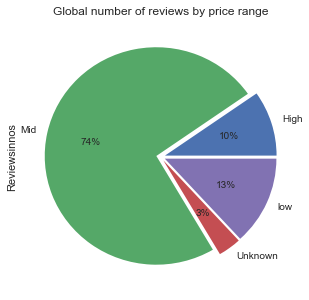

In [184]:
#Total reviews per price range in pie chart
total_reviews_pr.iloc[:,0].T.plot.pie(figsize=(5,5), legend=False, autopct='%.0f%%', explode=[0.04 for i in range(4)],
                        title="Global number of reviews by price range" )
plt.show()


In [183]:
reviews_count_pr

,low price range,mid price range,high price range,unknown price range
City,,,,
Amsterdam,2528.0,25736.0,484.0,3015.0
Athens,1624.0,9163.0,562.0,2599.0
Barcelona,7489.0,66039.0,2267.0,6669.0
Berlin,2555.0,20180.0,1688.0,3909.0
Bratislava,793.0,1237.0,238.0,174.0
Brussels,1742.0,18766.0,638.0,1901.0
Budapest,3031.0,23919.0,513.0,3815.0
Copenhagen,27.0,12488.0,339.0,1581.0
Dublin,117.0,18279.0,210.0,1143.0


Analysis on Bases of city and Price range accorgingly .

In [50]:
reviews_rankrate_df = Rst.loc[:, ['Name', 'City', 'Reviewsinnos' , 'Rating']]   
reviews_rankrate_df['Ranking'] = reviews_rankrate_df.index +1
print(reviews_rankrate_df.tail(50))

                                          Name       City  Reviewsinnos  \
101406                             Jazz y Jazz      Paris      5.000000   
43464                               Va E Volte     Lisbon     65.000000   
16839                                 Pamfilya     Berlin     16.000000   
34131                      Saveurs et Couleurs     Geneva     66.000000   
19549                      Victoria Celtic Pub     Berlin      5.000000   
114428                                 Ranieri       Rome     17.000000   
98526                            Bermuda Onion      Paris    453.000000   
83272                            Crudo & Cotto      Milan    125.271649   
76517                              madera FINA     Madrid    125.271649   
32400                              Rocket Cafe  Edinburgh    111.000000   
60223           Pizza Hut Golders Green London     London      6.000000   
76363                          La Gran Muralla     Madrid    125.271649   
19839                    

In [51]:
Rst.isnull().sum()

Name               0
City               0
Cuisine         2522
Ranking            0
Rating             0
PriceinRange       0
Reviewsinnos       0
Reviews          752
dtype: int64

In [52]:
Rst.columns

Index(['Name', 'City', 'Cuisine', 'Ranking', 'Rating', 'PriceinRange',
       'Reviewsinnos', 'Reviews'],
      dtype='object')

In [53]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 


In [54]:
Rst['City'] = T.fit_transform(Rst['City'])
#Rst['Cuisine'] = T.fit_transform(Rst['Cuisine'])
Rst['Reviewsinnos'] = T.fit_transform(Rst['Reviewsinnos'])

In [55]:
Rst.head(10)

,Name,City,Cuisine,Ranking,Rating,PriceinRange,Reviewsinnos,Reviews
48307,Piebury Corner - Kings Cross,16,"['British', 'Bar', 'Pub', 'Diner', 'Scottish',...",2732.000000,4.50000,2,38,"[['Lovely evening', 'Brilliant pie before an a..."
108919,Pod Schudky,25,"['European', 'Czech']",3646.727568,3.97831,0,124,NaN
94004,Tofuya,24,['Japanese'],4608.000000,4.50000,2,20,"[['Great for a tasty and healthy lunch', 'A ne..."
27180,Tinto,6,['Spanish'],2035.000000,3.50000,0,13,"[['Great place', 'Brilliant'], ['02/15/2017', ..."
106532,Pivonkove Zatisi,25,NaN,2266.000000,4.00000,0,17,"[['Chinese is Chinese', 'Cheap but not very go..."
51328,Frankie & Benny's,16,"['Italian', 'American', 'Pizza', 'Vegetarian F...",5757.000000,3.50000,2,340,"[['Evening Meal', 'Brekkie'], ['12/22/2017', '..."
82367,Central Cafe,20,['Italian'],5448.000000,3.50000,2,18,"[['Central Caffe', 'The best was the cold hein..."
24440,Winery Boitsfort,5,"['Belgian', 'Mediterranean', 'European', 'Soups']",2499.000000,3.50000,2,2,"[[], []]"
75299,Kiosco Torrero,19,['Fusion'],7927.000000,2.00000,1,3,"[[], []]"
229,Sampurna,0,"['Asian', 'Indonesian', 'Vegetarian Friendly',...",230.000000,4.00000,2,626,"[['An authentic Indonesian meal in Amsterdam',..."


In [56]:
x = Rst.drop(["Name","Cuisine","Reviews","Rating"],axis = 1)

In [57]:
x.head()

,City,Ranking,PriceinRange,Reviewsinnos
48307,16,2732.000000,2,38
108919,25,3646.727568,0,124
94004,24,4608.000000,2,20
27180,6,2035.000000,0,13
106532,25,2266.000000,0,17


In [58]:
y = Rst['Rating']

In [59]:
x.shape

(10000, 4)

In [60]:
y.shape

(10000,)

In [61]:
Rst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 48307 to 84827
Data columns (total 8 columns):
Name            10000 non-null object
City            10000 non-null int32
Cuisine         7478 non-null object
Ranking         10000 non-null float64
Rating          10000 non-null float64
PriceinRange    10000 non-null int64
Reviewsinnos    10000 non-null int64
Reviews         9248 non-null object
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 664.1+ KB


In [287]:
from sklearn.preprocessing import StandardScaler
num_values1 = Rst.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(Rst[num_values1])
Rst[num_values1]=scaler.transform(Rst[num_values1])

In [288]:
Rst.head()

,Name,City,Cuisine,Ranking,Rating,PriceinRange,Reviewsinnos,Reviews
20201,Kino Bar,3,"['Bar', 'Grill', 'Pub']",NaN,-0.383293,-1.129159,3.581557,NaN
120095,Simmeringer Landbier,28,NaN,-0.360250,-0.978932,-1.129159,-0.492909,"[['Interesting place', 'What can I say'], ['07..."
124697,Schlauch,30,NaN,-0.757048,0.807983,-1.129159,-0.515296,"[['Good Organic Food At Moderate Prices', 'Bil..."
99852,Open Cafe,24,NaN,1.835077,-0.978932,-1.129159,-0.550743,"[['A good pit-stop'], ['12/04/2017']]"
21590,Slovenska Restauracia,4,"['Central European', 'European']",-0.790743,-0.978932,0.917902,-0.438807,"[['Do not go there', 'Mediocre and overpriced'..."


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

In [63]:
X_train.shape

(8000, 4)

In [65]:
X_test.shape

(2000, 4)

In [64]:
y_train.shape

(8000,)

In [66]:
y_test.shape

(2000,)

# Random Forest Regression

In [67]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [68]:
rfr.score(X_test,y_test)*100


67.45000829919012

# Ridge Regression

In [71]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [72]:
rdg.score(X_test,y_test)*100



8.669824856555042

# Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [74]:
lr.score(X_test, y_test)*100


8.669826776028522

In [ ]:
### Here we neglecting reviews and the Cuisine columns for future operation ...

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeRegressor


In [78]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 105)

In [79]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)


In [82]:
DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)

In [83]:
from sklearn.metrics import r2_score


In [84]:
r2_score(y_test,y_predict)

0.5616716867015281

We Can improve model efficiency by adding Reviews column .

# Reviews

In [9]:
Rst.Reviews.value_counts().sum()

9249

In [10]:
Rst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 117400 to 5330
Data columns (total 8 columns):
Name                 10000 non-null object
City                 10000 non-null object
Cuisine Style        7524 non-null object
Ranking              9246 non-null float64
Rating               9248 non-null float64
Price Range          6187 non-null object
Number of Reviews    8685 non-null float64
Reviews              9249 non-null object
dtypes: float64(3), object(5)
memory usage: 703.1+ KB


In [12]:
Rst["Reviews"]

117400    [['Drinks OK, Food so-so', 'Very rude staff'],...
11496     [['Fun, food and frivolity abound!', 'Good coc...
50259     [['Nice simple food and service', 'Very specia...
28611     [['Nice atmosphere, mediocre food', 'Good trad...
94655           [['Excellent Boulangerie'], ['07/28/2017']]
73658     [['Cheap franchise', 'Great atmosphere, inexpe...
23099     [['Simply fabulous', 'really tasty and with a ...
62279                                                   NaN
20787                                                   NaN
71878                                              [[], []]
123919    [['Adorable', 'Great food and coffee'], ['01/0...
100247                                             [[], []]
73275                       [['Cercanias'], ['10/12/2016']]
23668     [['Nothing special: ok food with a higher th.....
81223                                              [[], []]
84861     [['Bavarian fare', 'CLOSED'], ['08/18/2016', '...
35232                                   

In [15]:
Rst["Reviews"].replace(
    {'\d+[\/:\-]\d+[\/:\-\s]*[\dAaPpMm]*' : '', '\w+\s\d+[\,]\s\d+' : ''},
    regex=True,
    inplace=True,
    )

In [16]:
Rst.Reviews.head(60)

117400    [['Drinks OK, Food so-so', 'Very rude staff'],...
11496     [['Fun, food and frivolity abound!', 'Good coc...
50259     [['Nice simple food and service', 'Very specia...
28611     [['Nice atmosphere, mediocre food', 'Good trad...
94655                     [['Excellent Boulangerie'], ['']]
73658     [['Cheap franchise', 'Great atmosphere, inexpe...
23099     [['Simply fabulous', 'really tasty and with a ...
62279                                                   NaN
20787                                                   NaN
71878                                              [[], []]
123919    [['Adorable', 'Great food and coffee'], ['', '']]
100247                                             [[], []]
73275                                 [['Cercanias'], ['']]
23668     [['Nothing special: ok food with a higher th.....
81223                                              [[], []]
84861               [['Bavarian fare', 'CLOSED'], ['', '']]
35232                                   

In [17]:
type("Reviews")

str

In [119]:
review = pd.concat(["col","pair"], axis=1)


TypeError: cannot concatenate a non-NDFrame object

In [122]:
reviews = pd.dataframe([col])

AttributeError: module 'pandas' has no attribute 'dataframe'

In [121]:
 reviews = col.append(pair)

NameError: name 'col' is not defined

In [29]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\MY
[nltk_data]     DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=Rst['Reviews'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

KeyError: 0